In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
np.set_printoptions(suppress=True)

In [90]:
def calculate_loss(preds, true_values):
    loss =  (1/len(preds)) * np.sum((true_values - preds) ** 2)
    return loss

In [153]:
def calculate_gradients(data, preds, true_values):
    
    da0 = (-2 / len(data)) * np.sum(data * (true_values - preds))
    da1 = (-2 / len(data)) * np.sum((true_values - preds))
    return da0, da1

In [154]:
def update_values(learning_rate, a0, a1, da0, da1):
    a0 = a0 - learning_rate * da0
    a1 = a1 - learning_rate * da1
    return a0, a1

In [212]:
def plot_fitting(X_data, y_data, preds, loss, num_plot, ax):
    ax[int(num_plot / 2), num_plot % 2 ].scatter(X_data, y_data)
    ax[int(num_plot / 2), num_plot % 2 ].plot(X_data, preds, color='red')
    ax[int(num_plot / 2), num_plot % 2 ].title.set_text(f'plot number: {num_plot}, loss: {loss:.2f}')

In [233]:
alfa0 = 0.0
alfa1 = 0.0
da0, da1 = 0.0, 0.0
lr = 0.0001
X_train, y_train, coef = datasets.make_regression(n_samples=100,
                                      n_features=1,
                                      n_informative=1,
                                      noise=15, #becouse std = 15, lowest possible loss is around 225 on this dataset
                                      coef=True,
                                      random_state=0)
X_train = X_train.squeeze()                            
true_values = y_train
preds = X_train * alfa0 + alfa1 

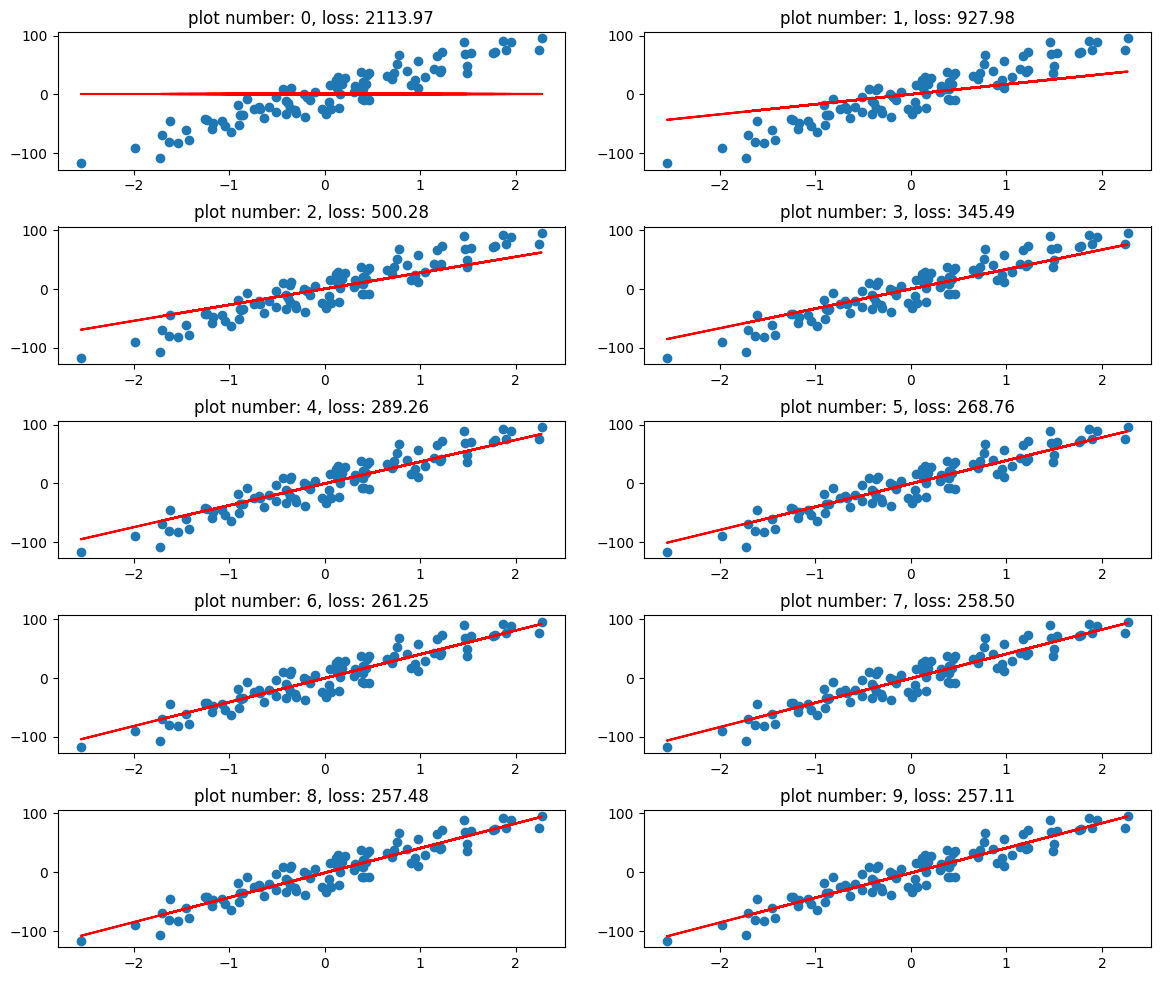

In [234]:
fig, ax = plt.subplots(5,2, figsize=(12,10))
fig.tight_layout(pad=2.0)
num_plot = 0
num_epochs = 25000
for i in range(num_epochs):
    #make predictions on train data
    preds = X_train * alfa0 + alfa1 
    #calculate loss based on predictions
    loss = calculate_loss(preds, y_train)
    #calculate gradients essential for parameters update 
    da0, da1 = calculate_gradients(X_train, preds, y_train)
    #updating parameters
    alfa0, alfa1 = update_values(lr, alfa0, alfa1, da0, da1)
    
    if i % (num_epochs // 10) == 0:
        #plotting results of training every x epochs
        plot_fitting(X_train, y_train, preds, loss, num_plot, ax)
        num_plot +=1
plt.show()